In [3]:
#downloading and extracting the dataset on colab's server
import urllib.request
urllib.request.urlretrieve ("https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz","a.tar.gz")
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [4]:
#head of the dataframe
data.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [5]:
#count of datapoints in each of the folders
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

In [7]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.

You should consider upgrading via the 'c:\users\satya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=92c7036c4c63b8688fb795ed6ff4f19f8f8d64d6186bd51f6673c5d591890e77
  Stored in directory: c:\users\satya\appdata\local\pip\cache\wheels\a2\a3\bd\ec1568ce7515115a11ab686d509ad302124c782af065de47ee
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=f9e1a29d2e756313bb4c2d1a1802708516712ac37c7f918630871627bb19d822
  Stored in directory: c:\users\satya\appdata\local\pip\cache\wheels\86\2c\7d\46a32a246b0e5939cea2c5ec1492164073e0c5d16d666ae2cd
Successfully built audioread resampy


In [8]:
from librosa import display
import librosa

In [10]:

#feature set
#This file is of a dog bark
y,sr=librosa.load("UrbanSound8K/audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=36)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape


<ipython-input-10-6291f51ba10e>:4: FutureWarning: Pass y=[-0.00346022 -0.00502555 -0.00465325 ... -0.00248061 -0.00155105
 -0.0003528 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(y, sr, n_mfcc=36)
c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=876
  return f(*args, **kwargs)
c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=438
  return f(*args, **kwargs)
c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=219
  return f(*args, **kwargs)
c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\librosa\util\decorators.py:88: UserWarn

((36, 14), (36, 14), (36, 14), (36, 14), (36, 14))

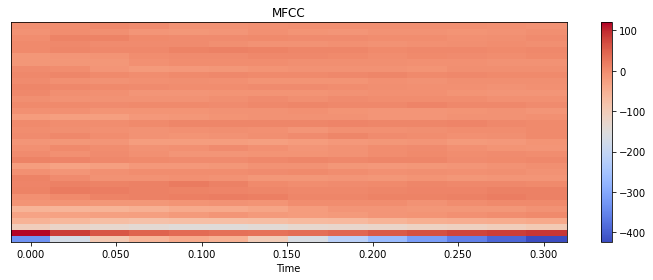

In [11]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

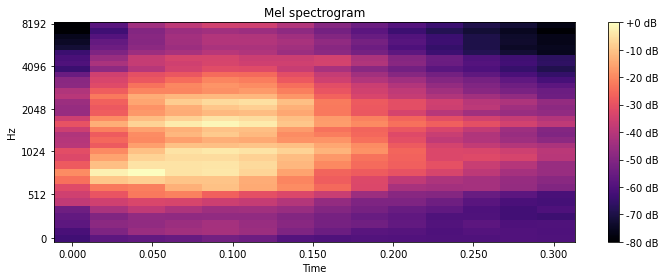

In [12]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

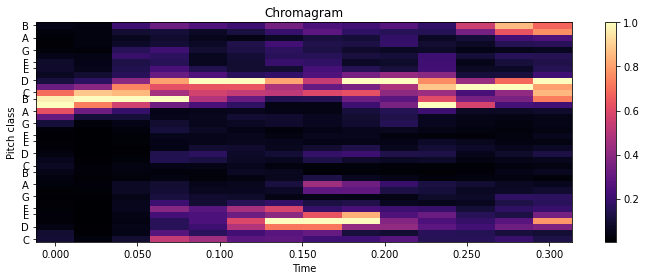

In [13]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

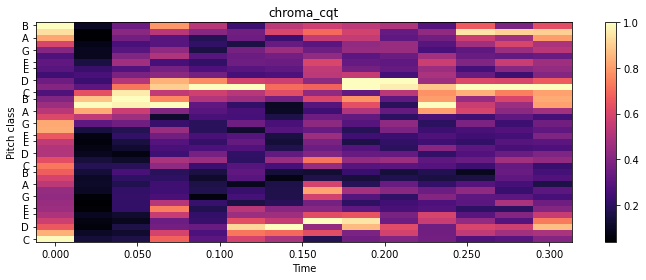

In [14]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

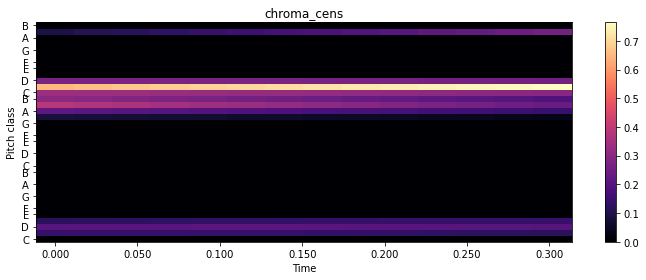

In [15]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

In [16]:


#feature set
y,sr=librosa.load("UrbanSound8K/audio/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape



<ipython-input-16-b799151bfc95>:3: FutureWarning: Pass y=[0.00124842 0.00428978 0.00623895 ... 0.00124255 0.00258898 0.00506599], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)


((36,), (36,), (36,), (36,), (36,))

In [17]:


#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
features.shape



(36, 5)

In [18]:
#preprocessing using only mfcc
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    if(fold_no!='10'):
      x_train.append(mfccs)
      y_train.append(label)
    else:
      x_test.append(mfccs)
      y_test.append(label)

  0%|                                                                                         | 0/8732 [00:00<?, ?it/s]<ipython-input-18-51f551b9f75f>:14: FutureWarning: Pass y=[-0.00346022 -0.00502555 -0.00465325 ... -0.00248061 -0.00155105
 -0.0003528 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
<ipython-input-18-51f551b9f75f>:14: FutureWarning: Pass y=[ 0.00273296  0.00364363  0.00230431 ... -0.0075485  -0.00460812
  0.00095757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
  0%|                                                                                 | 2/8732 [00:00<15:04,  9.65it/s]<ipython-input-18-51f551b9f75f>:14: FutureWarning: Pass y=[-0.00270751 -0.00303302 -0.00159557 ... -0.0012889  -0.00184731
 -0.00210062], sr

In [20]:
#preprocessing using entire feature set
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

  0%|                                                                                         | 0/8732 [00:00<?, ?it/s]<ipython-input-20-925fa73aba7f>:13: FutureWarning: Pass y=[-0.00346022 -0.00502555 -0.00465325 ... -0.00248061 -0.00155105
 -0.0003528 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
  0%|                                                                                 | 1/8732 [00:00<41:23,  3.52it/s]<ipython-input-20-925fa73aba7f>:13: FutureWarning: Pass y=[ 0.00273296  0.00364363  0.00230431 ... -0.0075485  -0.00460812
  0.00095757], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
  0%|                                                                               | 2/8732 [00:00<1:00:48,  2.39it/s]<ipython-input-20-925

In [21]:
len(x_train)+len(x_test)

8732

In [22]:
len(data)

8732

In [23]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 36, 5), (837, 36, 5), (7895,), (837,))

In [24]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

((7895, 180), (837, 180))

In [30]:
#saving the data numpy arrays
X_train=np.savetxt("train_data.csv", x_train_2d, delimiter=",")
X_test=np.savetxt("test_data.csv",x_test_2d,delimiter=",")
y_train=np.savetxt("train_labels.csv",y_train,delimiter=",")
y_test=np.savetxt("test_labels.csv",y_test,delimiter=",")

In [24]:
X_train=np.loadtxt("train_data.csv",delimiter=",")
X_test=np.loadtxt("test_data.csv",delimiter=",")
y_train=np.loadtxt("train_labels.csv",delimiter=",")
y_test=np.loadtxt("test_labels.csv",delimiter=",")

In [196]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [106]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 180), (837, 180), (7895,), (837,))

In [197]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [27]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

ANN

In [108]:
from keras import Sequential
from keras.layers import Dense,Dropout,Activation

In [198]:
#forming model
model=Sequential()

In [199]:
#building the model
model.add(Dense(units=256,activation='relu',input_dim=180))
model.add(Dropout(0.4))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=10,activation='softmax'))

In [200]:
#compiling
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [201]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               46336     
_________________________________________________________________
dropout_36 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_37 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_38 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 10)              

In [202]:
x_train.shape

(7895, 180)

In [203]:
y_train.shape

(7895, 10)

In [204]:
x_train.shape

(7895, 180)

In [205]:
#fitting
hist=model.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test),batch_size=30)

Epoch 1/30
264/264 [==============================] - 3s 6ms/step - loss: 8.4191 - accuracy: 0.1467 - val_loss: 2.1234 - val_accuracy: 0.1828
Epoch 2/30
264/264 [==============================] - 1s 4ms/step - loss: 2.1983 - accuracy: 0.2375 - val_loss: 1.8380 - val_accuracy: 0.3477
Epoch 3/30
264/264 [==============================] - 1s 5ms/step - loss: 1.9010 - accuracy: 0.3385 - val_loss: 1.6335 - val_accuracy: 0.5078
Epoch 4/30
264/264 [==============================] - 1s 5ms/step - loss: 1.6842 - accuracy: 0.4178 - val_loss: 1.5630 - val_accuracy: 0.4898
Epoch 5/30
264/264 [==============================] - 1s 5ms/step - loss: 1.4765 - accuracy: 0.4873 - val_loss: 1.4213 - val_accuracy: 0.5568
Epoch 6/30
264/264 [==============================] - 1s 5ms/step - loss: 1.3077 - accuracy: 0.5583 - val_loss: 1.3422 - val_accuracy: 0.5615
Epoch 7/30
264/264 [==============================] - 1s 5ms/step - loss: 1.1756 - accuracy: 0.6068 - val_loss: 1.3090 - val_accuracy: 0.5950
Epoch 

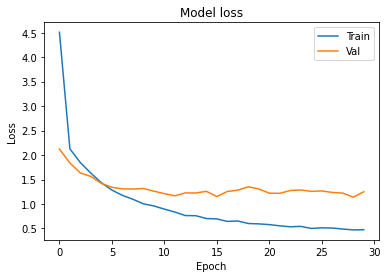

In [206]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

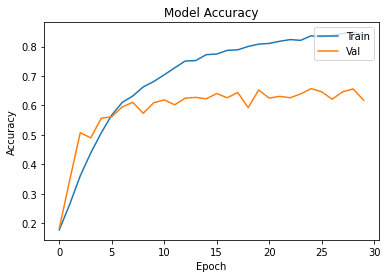

In [208]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [117]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

27/27 [==============================] - 0s 3ms/step - loss: 1.3096 - accuracy: 0.6559
[0.228226438164711, 0.9243825078010559]
[1.3096100091934204, 0.6559139490127563]


In [118]:
pred=model.predict(x_test)

In [119]:
pred.shape

(837, 10)

In [120]:
pred

array([[3.22441367e-04, 1.32446899e-03, 1.25299469e-02, ...,
        1.72836008e-04, 6.26859779e-04, 9.21223521e-01],
       [2.23579146e-02, 1.00738652e-01, 8.32046047e-02, ...,
        1.01131916e-01, 1.31532047e-02, 4.30621475e-01],
       [5.06578106e-03, 2.61226390e-02, 3.33176434e-01, ...,
        5.68380905e-03, 1.07818116e-02, 2.61081517e-01],
       ...,
       [7.23189954e-03, 5.02135754e-02, 2.53610499e-02, ...,
        5.09438038e-01, 1.50411192e-03, 1.59445748e-01],
       [2.12989352e-03, 3.72607186e-02, 2.35541593e-02, ...,
        3.83950174e-01, 1.17890723e-03, 3.64125706e-02],
       [1.77381989e-05, 1.04122581e-02, 4.89661645e-04, ...,
        1.34717837e-01, 2.60309280e-05, 1.98215689e-03]], dtype=float32)

In [121]:
ypred = model.predict_classes(x_test, verbose=0)

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [122]:
ypred

array([9, 9, 2, 1, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 2, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 9, 2, 9, 2, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 8, 3, 3,
       3, 4, 4, 3, 3, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 2, 9, 9, 8, 9, 9, 9, 2,
       9, 9, 5, 5, 9, 9, 9, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 0, 2,
       9, 2, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 3, 9, 2, 2, 2, 2, 2, 2, 2, 9, 9, 0,

In [123]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [124]:
y_test = np.argmax ( y_test, axis=-1 )

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.83      0.35      0.49       100
           1       0.89      0.73      0.80        33
           2       0.43      0.78      0.56       100
           3       0.57      0.69      0.62       100
           4       0.65      0.68      0.67       100
           5       0.85      0.56      0.68        93
           6       1.00      0.69      0.81        32
           7       0.75      0.77      0.76        96
           8       0.85      0.61      0.71        83
           9       0.64      0.76      0.69       100

    accuracy                           0.66       837
   macro avg       0.75      0.66      0.68       837
weighted avg       0.71      0.66      0.66       837



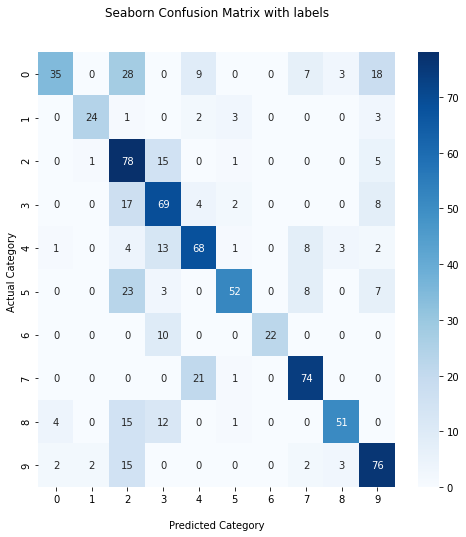

In [127]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()

CNN

In [171]:
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [172]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 180), (837, 180), (7895,), (837,))

In [173]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [174]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 30,6))
x_test=np.reshape(x_test,(x_test.shape[0], 30,6))
x_train.shape,x_test.shape

((7895, 30, 6), (837, 30, 6))

In [175]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 30,6,1))
x_test=np.reshape(x_test,(x_test.shape[0], 30,6,1))

In [176]:
#shapes
x_train.shape,x_test.shape

((7895, 30, 6, 1), (837, 30, 6, 1))

In [177]:
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [178]:
#forming model
model=Sequential()

In [179]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(30,6,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [180]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [181]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 6, 64)         1664      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 3, 64)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 2, 128)         0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 8, 2, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)             

In [185]:
#training the model
hist=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
158/158 [==============================] - 14s 78ms/step - loss: 2.4005 - accuracy: 0.1980 - val_loss: 1.5659 - val_accuracy: 0.4265
Epoch 2/30
158/158 [==============================] - 12s 77ms/step - loss: 1.6008 - accuracy: 0.4354 - val_loss: 1.3167 - val_accuracy: 0.5364
Epoch 3/30
158/158 [==============================] - 11s 71ms/step - loss: 1.2223 - accuracy: 0.5779 - val_loss: 1.1449 - val_accuracy: 0.5974
Epoch 4/30
158/158 [==============================] - 10s 66ms/step - loss: 0.9708 - accuracy: 0.6698 - val_loss: 0.9900 - val_accuracy: 0.6750
Epoch 5/30
158/158 [==============================] - 11s 67ms/step - loss: 0.9006 - accuracy: 0.6993 - val_loss: 0.9717 - val_accuracy: 0.6679
Epoch 6/30
158/158 [==============================] - 11s 67ms/step - loss: 0.7439 - accuracy: 0.7434 - val_loss: 1.0161 - val_accuracy: 0.6547
Epoch 7/30
158/158 [==============================] - 11s 68ms/step - loss: 0.7248 - accuracy: 0.7584 - val_loss: 0.8989 - val_accuracy:

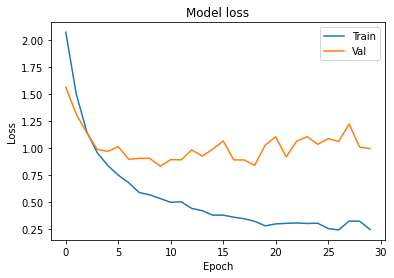

In [186]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

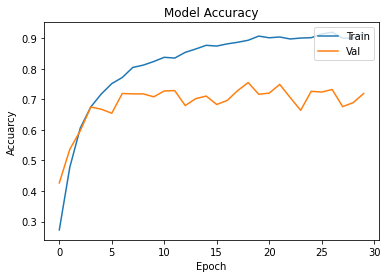

In [187]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuarcy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [95]:
ypred = model.predict_classes(x_test, verbose=0)

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [96]:
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [97]:
y_test = np.argmax ( y_test, axis=-1 )

In [98]:
y_test

array([1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 3, 3, 9, 9, 9, 9, 9, 9, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 5, 5, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 9, 9, 9,

In [99]:
ypred

array([3, 7, 4, 4, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 7, 7, 7, 0, 7, 7, 7, 7, 1, 2, 9, 9, 2, 9, 1, 9,
       9, 9, 9, 9, 0, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 5,
       5, 5, 7, 7, 5, 2, 4, 2, 5, 5, 5, 2, 2, 5, 7, 0, 0, 0, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 2, 9, 2, 9, 9, 9, 9, 9, 2,
       4, 9, 5, 5, 9, 4, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 9, 0, 0,
       9, 2, 9, 9, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2,
       2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 4, 4, 4, 3,
       3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 2, 8,
       8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 3, 3, 2, 2, 9, 2, 2, 2, 2, 2, 9, 9, 9,

In [100]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       100
           1       0.89      0.73      0.80        33
           2       0.58      0.84      0.68       100
           3       0.59      0.76      0.67       100
           4       0.64      0.82      0.72       100
           5       0.90      0.56      0.69        93
           6       0.89      1.00      0.94        32
           7       0.80      0.81      0.81        96
           8       0.94      0.59      0.73        83
           9       0.88      0.74      0.80       100

    accuracy                           0.75       837
   macro avg       0.80      0.76      0.77       837
weighted avg       0.79      0.75      0.75       837



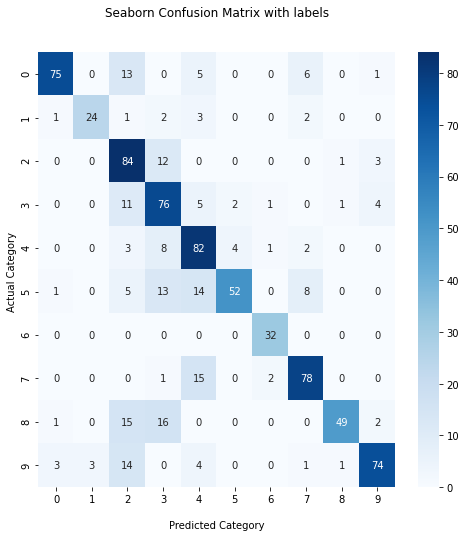

In [101]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()

LSTM

In [149]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [150]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7895, 180), (837, 180), (7895,), (837,))

In [151]:
x_train.shape

(7895, 180)

In [152]:
x_test.shape

(837, 180)

In [153]:
y_train.shape

(7895,)

In [154]:
y_test.shape

(837,)

In [155]:
x_train = x_train.reshape(-1, 1, 180)
x_test  = x_test.reshape(-1, 1, 180)
#y_train = y_train.reshape(-1, 1, 180)
#y_test = y_test.reshape(-1, 1, 5)

In [156]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

((7895, 10), (837, 10))

In [157]:
from keras.models import Model, Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Bidirectional

In [158]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None, 180)))
model.add(Dropout(0.25))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.25)) 
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [170]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, None, 128)         158208    
_________________________________________________________________
dropout_28 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 208,266
Trainable params: 208,266
Non-trainable params: 0
_________________________________________________________________


In [159]:
#training the model
hist=model.fit(x_train,y_train,batch_size=50,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
158/158 [==============================] - 13s 24ms/step - loss: 2.0667 - accuracy: 0.2805 - val_loss: 1.4480 - val_accuracy: 0.5018
Epoch 2/30
158/158 [==============================] - 2s 10ms/step - loss: 1.2284 - accuracy: 0.5950 - val_loss: 1.2698 - val_accuracy: 0.5591
Epoch 3/30
158/158 [==============================] - 2s 10ms/step - loss: 0.9031 - accuracy: 0.7093 - val_loss: 1.2245 - val_accuracy: 0.6260
Epoch 4/30
158/158 [==============================] - 2s 10ms/step - loss: 0.7557 - accuracy: 0.7588 - val_loss: 1.2473 - val_accuracy: 0.6165
Epoch 5/30
158/158 [==============================] - 2s 10ms/step - loss: 0.6667 - accuracy: 0.7891 - val_loss: 1.2279 - val_accuracy: 0.6284
Epoch 6/30
158/158 [==============================] - 2s 10ms/step - loss: 0.5845 - accuracy: 0.8148 - val_loss: 1.3634 - val_accuracy: 0.6022
Epoch 7/30
158/158 [==============================] - 2s 11ms/step - loss: 0.5456 - accuracy: 0.8291 - val_loss: 1.2594 - val_accuracy: 0.632

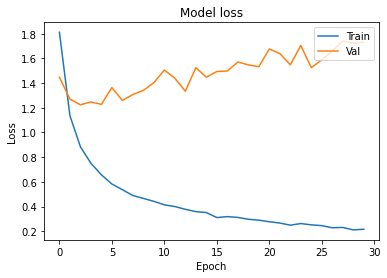

In [160]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

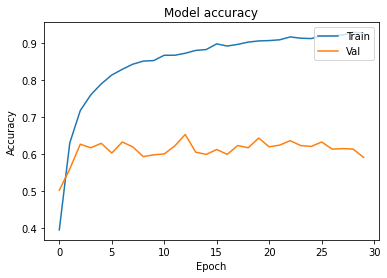

In [184]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [161]:
ypred = model.predict_classes(x_test, verbose=0)

c:\users\satya\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [162]:
ypred

array([9, 9, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 0, 0, 7, 9, 7, 7, 7, 5, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 8, 3, 3,
       3, 9, 5, 9, 9, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 9, 9, 9, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9, 9, 2, 0, 9, 9, 9, 9,
       9, 9, 5, 5, 9, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 2, 4, 2, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 2, 9, 2, 9, 9, 9, 9, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 6, 6, 6, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 2, 7, 7, 7, 4, 4, 0, 4, 4, 4, 4, 4, 0, 7, 7,
       0, 0, 0, 0, 0, 7, 4, 7, 7, 7, 0, 4, 4, 7, 7, 7, 7, 4, 7, 7, 7, 4,
       4, 4, 7, 7, 7, 2, 4, 2, 2, 7, 5, 4, 7, 4, 4, 5, 5, 4, 4, 4, 7, 7,
       7, 7, 3, 3, 9, 9, 9, 2, 2, 2, 2, 2, 4, 9, 9,

In [163]:
y_test = np.argmax ( y_test, axis=-1 )

In [164]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.62      0.36      0.46       100
           1       0.77      0.70      0.73        33
           2       0.48      0.69      0.57       100
           3       0.50      0.71      0.58       100
           4       0.56      0.70      0.62       100
           5       0.88      0.54      0.67        93
           6       0.95      0.66      0.78        32
           7       0.54      0.42      0.47        96
           8       0.76      0.47      0.58        83
           9       0.56      0.75      0.64       100

    accuracy                           0.59       837
   macro avg       0.66      0.60      0.61       837
weighted avg       0.63      0.59      0.59       837



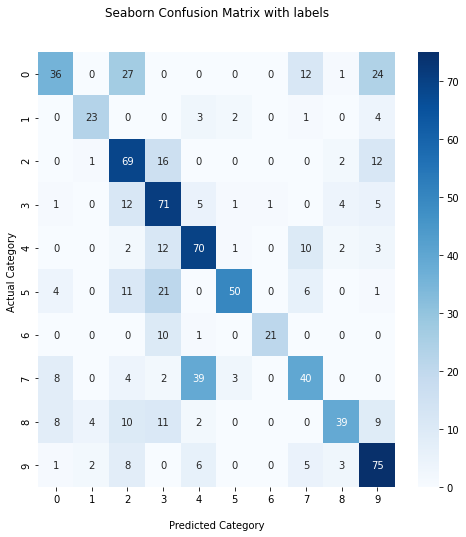

In [165]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');


## Display the visualization of the Confusion Matrix.
plt.show()